<a href="https://colab.research.google.com/github/vaibhavvesmaker/NavyFinancialAnalysis/blob/main/DoD_Navy_Financial_ManagementAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   Revenue        365 non-null    int64         
 2   Expenses       365 non-null    int64         
 3   Profit         365 non-null    int64         
 4   Department     365 non-null    object        
 5   Profit Margin  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 17.2+ KB
None

Summary Statistics:
                      Date       Revenue      Expenses       Profit  \
count                  365    365.000000    365.000000   365.000000   
mean   2023-07-02 00:00:00  28637.304110  17525.772603  5996.821918   
min    2023-01-01 00:00:00  10161.000000   5009.000000  2003.000000   
25%    2023-04-02 00:00:00  18110.000000  10726.000000  4039.000000   
50%    2023

<ipython-input-8-ce97049277aa>:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Revenue', data=df, hue='Department', ci=None)


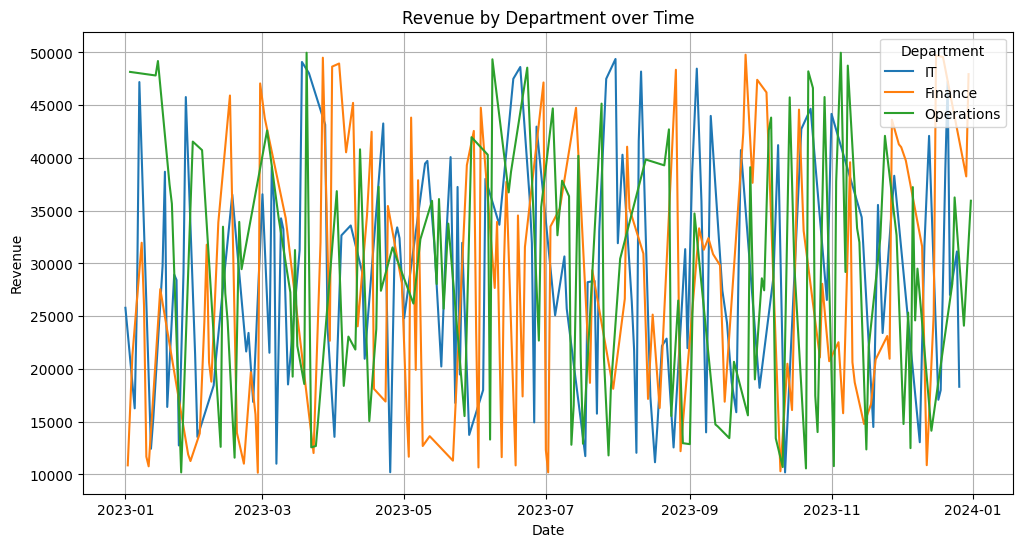


Total Profit by Department:
Department
Finance       752629
IT            746038
Operations    690173
Name: Profit, dtype: int64

Monthly Expenses:
Date
2023-01    546087
2023-02    501133
2023-03    515203
2023-04    499574
2023-05    533181
2023-06    555870
2023-07    557776
2023-08    499523
2023-09    563711
2023-10    546033
2023-11    508332
2023-12    570484
Freq: M, Name: Expenses, dtype: int64

Processed data saved to 'processed_data.csv'.

T-test for Profit Margin between IT and Other Departments:
T-statistic: -0.64, p-value: 0.5240

T-test for Profit Margin between Finance and Other Departments:
T-statistic: 1.92, p-value: 0.0550

T-test for Profit Margin between Operations and Other Departments:
T-statistic: -1.27, p-value: 0.2035


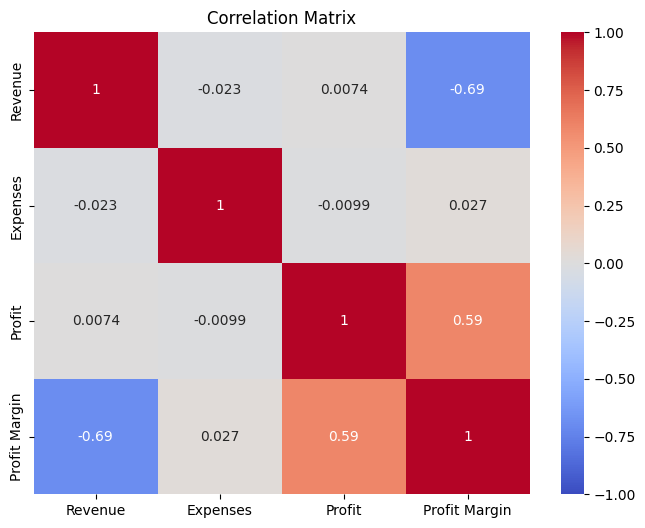

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

# Create a dummy dataset
np.random.seed(42)

# Generate dummy financial data
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
data = {
    'Date': dates,
    'Revenue': np.random.randint(10000, 50000, size=len(dates)),
    'Expenses': np.random.randint(5000, 30000, size=len(dates)),
    'Profit': np.random.randint(2000, 10000, size=len(dates)),
    'Department': np.random.choice(['Finance', 'Operations', 'IT'], size=len(dates))
}

df = pd.DataFrame(data)
df['Profit Margin'] = (df['Profit'] / df['Revenue']) * 100

# Basic data exploration
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Data visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Revenue', data=df, hue='Department', ci=None)
plt.title('Revenue by Department over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

# Statistical analysis
profit_by_dept = df.groupby('Department')['Profit'].sum()
print("\nTotal Profit by Department:")
print(profit_by_dept)

# Automation example: Calculating monthly expenses
monthly_expenses = df.groupby(df['Date'].dt.to_period('M'))['Expenses'].sum()
print("\nMonthly Expenses:")
print(monthly_expenses)

# Saving processed data
df.to_csv('processed_data.csv', index=False)
print("\nProcessed data saved to 'processed_data.csv'.")

# Advanced analysis: Time series decomposition
df['Month'] = df['Date'].dt.month
monthly_revenue = df.groupby('Month')['Revenue'].sum()



# Hypothesis testing example: Compare profit margins by department
dept_list = df['Department'].unique()
for dept in dept_list:
    sample1 = df[df['Department'] == dept]['Profit Margin']
    sample2 = df[df['Department'] != dept]['Profit Margin']
    t_stat, p_value = stats.ttest_ind(sample1, sample2)
    print(f"\nT-test for Profit Margin between {dept} and Other Departments:")
    print(f"T-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")

# Correlation analysis
correlation_matrix = df[['Revenue', 'Expenses', 'Profit', 'Profit Margin']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           365 non-null    datetime64[ns]
 1   Revenue        365 non-null    int64         
 2   Expenses       365 non-null    int64         
 3   Profit         365 non-null    int64         
 4   Department     365 non-null    object        
 5   Profit Margin  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 17.2+ KB
None

Summary Statistics:
                      Date       Revenue      Expenses       Profit  \
count                  365    365.000000    365.000000   365.000000   
mean   2023-07-02 00:00:00  28637.304110  17525.772603  5996.821918   
min    2023-01-01 00:00:00  10161.000000   5009.000000  2003.000000   
25%    2023-04-02 00:00:00  18110.000000  10726.000000  4039.000000   
50%    2023

<ipython-input-7-09534d427ec9>:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Revenue', data=df, hue='Department', ci=None)


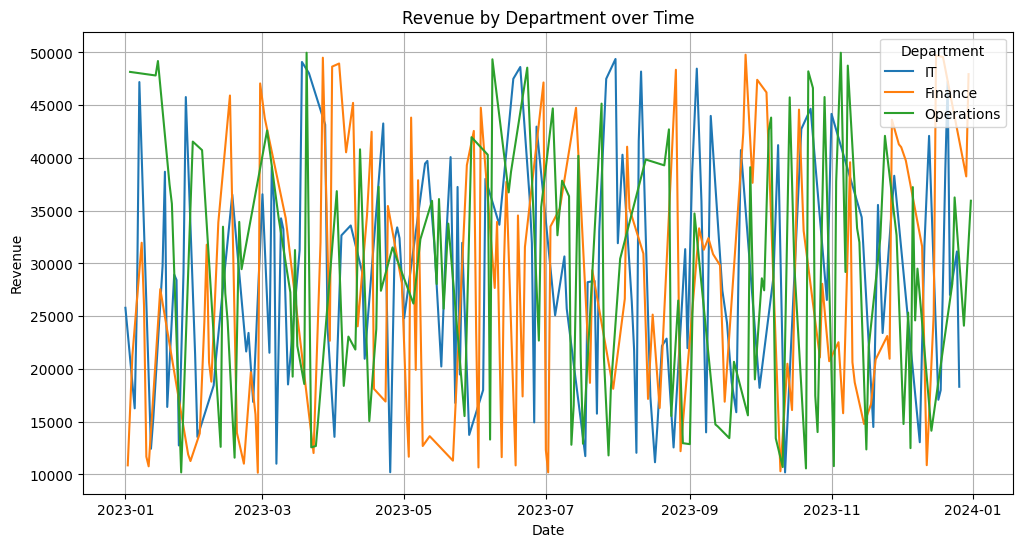


Total Profit by Department:
Department
Finance       752629
IT            746038
Operations    690173
Name: Profit, dtype: int64

Monthly Expenses:
Date
2023-01    546087
2023-02    501133
2023-03    515203
2023-04    499574
2023-05    533181
2023-06    555870
2023-07    557776
2023-08    499523
2023-09    563711
2023-10    546033
2023-11    508332
2023-12    570484
Freq: M, Name: Expenses, dtype: int64

Processed data saved to 'processed_data.csv'.

T-test for Profit Margin between IT and Other Departments:
T-statistic: -0.64, p-value: 0.5240

T-test for Profit Margin between Finance and Other Departments:
T-statistic: 1.92, p-value: 0.0550

T-test for Profit Margin between Operations and Other Departments:
T-statistic: -1.27, p-value: 0.2035


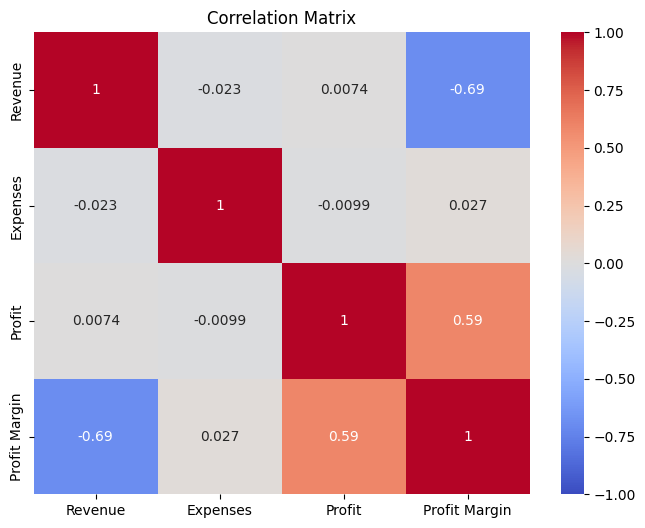

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Create a dummy dataset
np.random.seed(42)

# Generate dummy financial data
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
data = {
    'Date': dates,
    'Revenue': np.random.randint(10000, 50000, size=len(dates)),
    'Expenses': np.random.randint(5000, 30000, size=len(dates)),
    'Profit': np.random.randint(2000, 10000, size=len(dates)),
    'Department': np.random.choice(['Finance', 'Operations', 'IT'], size=len(dates))
}

df = pd.DataFrame(data)
df['Profit Margin'] = (df['Profit'] / df['Revenue']) * 100

# Basic data exploration
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Data visualization
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Revenue', data=df, hue='Department', ci=None)
plt.title('Revenue by Department over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

# Statistical analysis
profit_by_dept = df.groupby('Department')['Profit'].sum()
print("\nTotal Profit by Department:")
print(profit_by_dept)

# Automation example: Calculating monthly expenses
monthly_expenses = df.groupby(df['Date'].dt.to_period('M'))['Expenses'].sum()
print("\nMonthly Expenses:")
print(monthly_expenses)

# Saving processed data
df.to_csv('processed_data.csv', index=False)
print("\nProcessed data saved to 'processed_data.csv'.")

# Hypothesis testing example: Compare profit margins by department
dept_list = df['Department'].unique()
for dept in dept_list:
    sample1 = df[df['Department'] == dept]['Profit Margin']
    sample2 = df[df['Department'] != dept]['Profit Margin']
    t_stat, p_value = stats.ttest_ind(sample1, sample2)
    print(f"\nT-test for Profit Margin between {dept} and Other Departments:")
    print(f"T-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")

# Correlation analysis
correlation_matrix = df[['Revenue', 'Expenses', 'Profit', 'Profit Margin']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
